In [1]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
import shutil

'''
다른사람의 파일네임이 0~99.jpg인 경우가 많아
데이터셋을 합칠 때 사용하는 file move 함수 구현
'''


def file_move(path1, path2):
    start = path1
    destination = path2
    
    get_files = os.listdir(start)
    idx=100
    for f in get_files:
        shutil.move(start + f, destination + f'{idx}.jpg')
        idx+=1

In [23]:
train_dir = './data/rock_scissor_paper/train/'
test_dir = './data/rock_scissor_paper/test/'

In [24]:
file_move(test_dir+'paper/', train_dir+'paper/')
file_move(test_dir+'rock/', train_dir+'rock/')
file_move(test_dir+'scissor/', train_dir+'scissor/')

In [2]:
#data load
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/rock_scissor_paper/train',
    shuffle=True,
    seed=42,
    image_size=(224, 224),
    batch_size=10)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/rock_scissor_paper/test',
    seed=42,
    image_size=(224,224),
    batch_size=10
)

Found 600 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


## Sequential layer에 data augmentation 추가하기

In [3]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224, 224),
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(.2,.2)
])

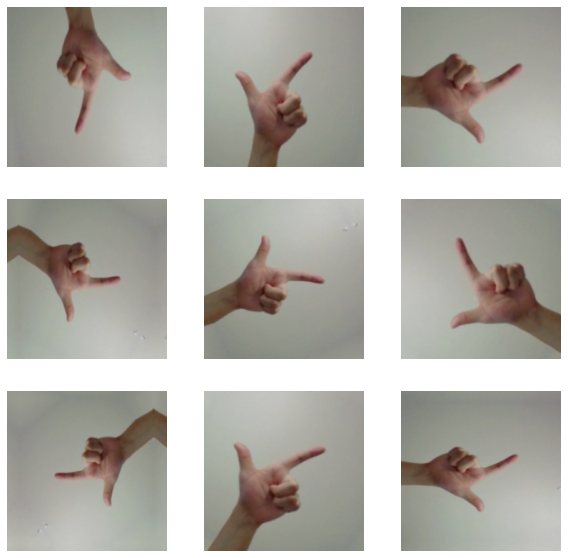

In [4]:
ex_img, ex_label = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
    resize_img = resize_and_rescale(ex_img)
    augmented_image = data_augmentation(resize_img)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [10]:
'''
MaxPool2D 대신 strides=2 사용한 모델
'''


model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, strides=2, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.Conv2D(128, 3, strides=2, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.Conv2D(256, 3, strides=2, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

epochs=10
history = model.fit(train_ds,epochs=epochs)
model.summary()

Epoch 1/10
60/60 [==============================] - 3s 20ms/step - loss: 1.1077 - accuracy: 0.3800
Epoch 2/10
60/60 [==============================] - 1s 20ms/step - loss: 0.7917 - accuracy: 0.5800
Epoch 3/10
60/60 [==============================] - 1s 20ms/step - loss: 0.5364 - accuracy: 0.7617
Epoch 4/10
60/60 [==============================] - 1s 21ms/step - loss: 0.4630 - accuracy: 0.7867
Epoch 5/10
60/60 [==============================] - 1s 21ms/step - loss: 0.3583 - accuracy: 0.8583
Epoch 6/10
60/60 [==============================] - 1s 20ms/step - loss: 0.3429 - accuracy: 0.8483
Epoch 7/10
60/60 [==============================] - 1s 20ms/step - loss: 0.2884 - accuracy: 0.8900
Epoch 8/10
60/60 [==============================] - 1s 21ms/step - loss: 0.2936 - accuracy: 0.8817
Epoch 9/10
60/60 [==============================] - 1s 20ms/step - loss: 0.2336 - accuracy: 0.9150
Epoch 10/10
60/60 [==============================] - 1s 22ms/step - loss: 0.2215 - accuracy: 0.9150 0s - loss

In [11]:
loss, acc = model.evaluate(test_ds)
print(f'loss: {loss:.3f}, accuracy: {acc:.3f}')

30/30 [==============================] - 1s 12ms/step - loss: 2.3628 - accuracy: 0.7000
loss: 2.363, accuracy: 0.700


In [28]:
'''
MaxPool2D 사용한 모델
'''
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

epochs=10
history = model.fit(train_ds,epochs=epochs)

Epoch 1/10
60/60 [==============================] - 4s 23ms/step - loss: 1.1057 - accuracy: 0.3233
Epoch 2/10
60/60 [==============================] - 1s 21ms/step - loss: 0.9940 - accuracy: 0.4683
Epoch 3/10
60/60 [==============================] - 1s 21ms/step - loss: 0.4183 - accuracy: 0.8217
Epoch 4/10
60/60 [==============================] - 1s 21ms/step - loss: 0.3134 - accuracy: 0.8733
Epoch 5/10
60/60 [==============================] - 1s 21ms/step - loss: 0.2453 - accuracy: 0.9133
Epoch 6/10
60/60 [==============================] - 1s 22ms/step - loss: 0.1989 - accuracy: 0.9250
Epoch 7/10
60/60 [==============================] - 1s 21ms/step - loss: 0.1740 - accuracy: 0.9400
Epoch 8/10
60/60 [==============================] - 1s 22ms/step - loss: 0.1460 - accuracy: 0.9500
Epoch 9/10
60/60 [==============================] - 1s 22ms/step - loss: 0.1732 - accuracy: 0.9467 0s - loss: 0
Epoch 10/10
60/60 [==============================] - 1s 23ms/step - loss: 0.1597 - accuracy: 0.9

In [29]:
loss, acc = model.evaluate(test_ds)
print(f'loss: {loss:.3f}, accuracy: {acc:.3f}')

30/30 [==============================] - 1s 11ms/step - loss: 0.9650 - accuracy: 0.7767
loss: 0.965, accuracy: 0.777


## Pretrained Model 돌려보기

## ResNet50

In [19]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=3)

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_ds,epochs=epochs)

Epoch 1/10
60/60 [==============================] - 26s 160ms/step - loss: 1.2864 - accuracy: 0.6683
Epoch 2/10
60/60 [==============================] - 7s 120ms/step - loss: 0.4253 - accuracy: 0.8783
Epoch 3/10
60/60 [==============================] - 7s 119ms/step - loss: 0.4050 - accuracy: 0.8833
Epoch 4/10
60/60 [==============================] - 7s 122ms/step - loss: 0.2539 - accuracy: 0.9250
Epoch 5/10
60/60 [==============================] - 7s 120ms/step - loss: 0.1581 - accuracy: 0.9533
Epoch 6/10
60/60 [==============================] - 7s 120ms/step - loss: 0.1741 - accuracy: 0.9517
Epoch 7/10
60/60 [==============================] - 7s 121ms/step - loss: 0.1198 - accuracy: 0.9733
Epoch 8/10
60/60 [==============================] - 7s 118ms/step - loss: 0.0798 - accuracy: 0.9717
Epoch 9/10
60/60 [==============================] - 7s 118ms/step - loss: 0.0228 - accuracy: 0.9950
Epoch 10/10
60/60 [==============================] - 7s 124ms/step - loss: 0.0239 - accuracy: 0.993

In [21]:
loss, acc = model.evaluate(test_ds)
print(f'loss: {loss:.3f}, accuracy: {acc:.3f}')

30/30 [==============================] - 2s 41ms/step - loss: 12.8853 - accuracy: 0.5367
loss: 12.885, accuracy: 0.537


## MobileNetV2

In [30]:
from tensorflow.keras.applications import MobileNetV2

model = ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=3)

In [31]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_ds,epochs=epochs)

Epoch 1/10
60/60 [==============================] - 15s 122ms/step - loss: 1.4747 - accuracy: 0.6600
Epoch 2/10
60/60 [==============================] - 7s 119ms/step - loss: 0.1738 - accuracy: 0.9400
Epoch 3/10
60/60 [==============================] - 7s 118ms/step - loss: 0.2667 - accuracy: 0.9200
Epoch 4/10
60/60 [==============================] - 7s 118ms/step - loss: 0.1755 - accuracy: 0.9517
Epoch 5/10
60/60 [==============================] - 7s 117ms/step - loss: 0.2522 - accuracy: 0.9317
Epoch 6/10
60/60 [==============================] - 7s 117ms/step - loss: 0.0937 - accuracy: 0.9700
Epoch 7/10
60/60 [==============================] - 7s 117ms/step - loss: 0.0699 - accuracy: 0.9783
Epoch 8/10
60/60 [==============================] - 7s 117ms/step - loss: 0.0736 - accuracy: 0.9850
Epoch 9/10
60/60 [==============================] - 7s 117ms/step - loss: 0.0969 - accuracy: 0.9600
Epoch 10/10
60/60 [==============================] - 7s 119ms/step - loss: 0.3175 - accuracy: 0.906

In [32]:
loss, acc = model.evaluate(test_ds)
print(f'loss: {loss:.3f}, accuracy: {acc:.3f}')

30/30 [==============================] - 3s 38ms/step - loss: 15.8657 - accuracy: 0.3333
loss: 15.866, accuracy: 0.333
